### Libraries and Data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Load data
data_file = "/home/konsster/Desktop/AUThPhysDepart/Computational_Quantum_Physics_and_Applications/Project_1/data/entropy_data.csv"
df = pd.read_csv(data_file)

print("Data preview:")
df.head()

Data preview:


,Z,Element,Sr,Sk,S,Smax,Omega,O
0,1,H,4.14473,2.42186,6.56659,7.9054,0.21113,120.26700
1,2,He,2.69851,3.91342,6.61193,7.0493,0.06204,100.36100
2,3,Li,3.07144,3.99682,7.69826,10.3578,0.25677,9.15713
3,4,Be,3.62386,4.19019,7.81405,10.3950,0.24829,8.45434
4,5,B,3.40545,4.70590,8.11135,10.3738,0.21810,15.96530


### Expnential model

In [2]:
Z = df['Z'].values
S = df['S'].values

# Define exponential function (S vs Z)
def exp_func(s, a, b):
    """Exponential model Z = a*exp(b*S)"""
    return a * np.exp(b * s)

# Fit the model
popt, pcov = curve_fit(exp_func, S, Z, p0=[1, 0.1])
a, b = popt
print(f"\nFitted model: Z = {a:.3f} * exp({b:.3f}*S)")


Fitted model: Z = 0.002 * exp(0.956*S)


### Plot of $Z=f(S)$

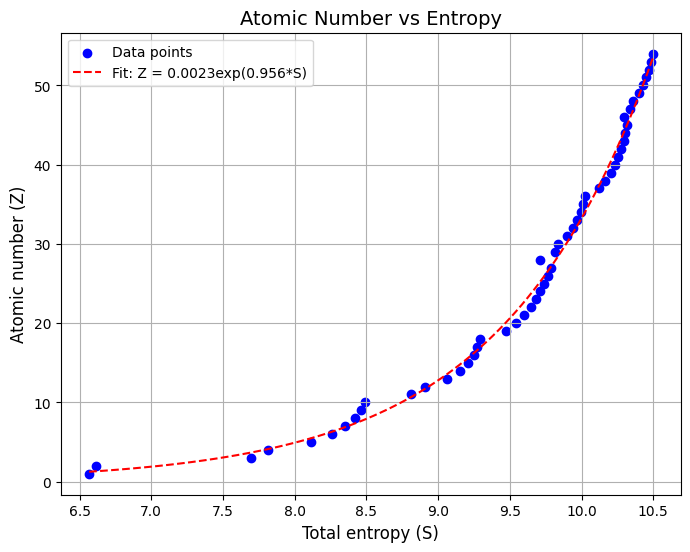

In [3]:
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(S, Z, color='blue', label='Data points')

# Plot fitted curve
S_fit = np.linspace(S.min(), S.max(), 100)
Z_fit = exp_func(S_fit, a, b)
plt.plot(S_fit, Z_fit, 'r--', label=f'Fit: Z = {a:.4f}exp({b:.3f}*S)')

# Format plot
plt.xlabel('Total entropy (S)', fontsize=12)
plt.ylabel('Atomic number (Z)', fontsize=12)
plt.title('Atomic Number vs Entropy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [4]:
Z_pred = exp_func(S, a, b)
residuals = Z - Z_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Z - np.mean(Z))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"\nModel evaluation:")
print(f"R-squared = {r2:.4f}")
print(f"Mean residual = {np.mean(residuals):.4f}")


Model evaluation:
R-squared = 0.9951
Mean residual = 0.0169
